### Generative adversarial network for y=x^2.


In [53]:
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from numpy import zeros
from numpy import ones
from numpy import hstack

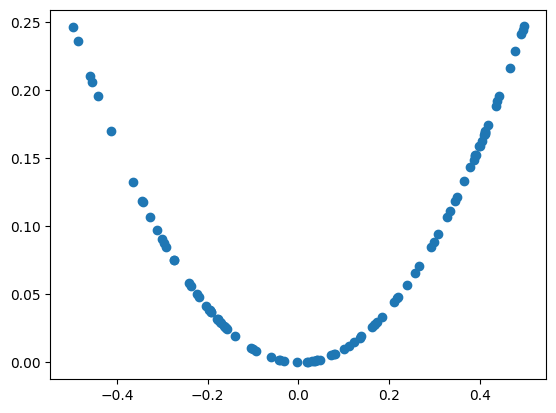

In [54]:
# generating random samples

def generate_samples(n=100):
 X1 = rand(n) - 0.5
 X2 = X1 * X1
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 return hstack((X1, X2))
 
data = generate_samples()
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [55]:
# Defining the model 

def define_discriminator(n_inputs=2):
 model = Sequential()
 model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
 model.add(Dense(1, activation='sigmoid'))
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [56]:
# generating real samples

def generate_real_samples(n):
 X1 = rand(n) - 0.5
 X2 = X1 * X1
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
 y = ones((n, 1))
 return X, y

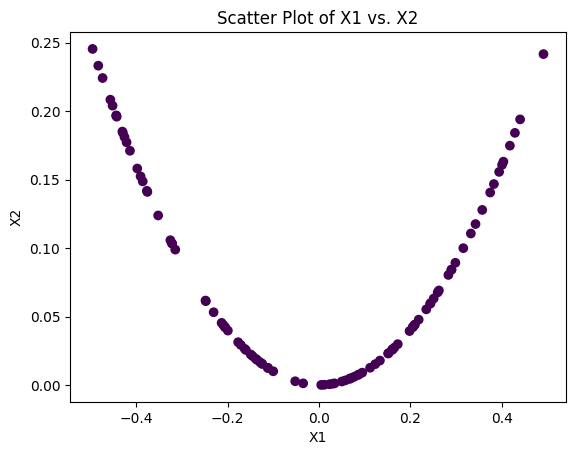

In [57]:
# Plot Between X1 and X2

data, labels = generate_real_samples(n=100)
pyplot.scatter(data[:, 0], data[:, 1], c=labels.ravel(), cmap='viridis')
pyplot.xlabel('X1')
pyplot.ylabel('X2')
pyplot.title('Scatter Plot of X1 vs. X2')
pyplot.show()

In [58]:
def generate_fake_samples(n):
 X1 = -1 + rand(n) * 2
 X2 = -1 + rand(n) * 2
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
 y = zeros((n, 1))
 return X, y



In [59]:
def train_discriminator(model, n_epochs=100, n_batch=128):
    half_batch = int(n_batch / 2)
    real_accuracy_arr = []
    fake_accuracy_arr = []
    
    for i in range(n_epochs):
        
        # real
        X_real, y_real = generate_real_samples(half_batch)
        model.train_on_batch(X_real, y_real)
        
        # fake
        X_fake, y_fake = generate_fake_samples(half_batch)
        model.train_on_batch(X_fake, y_fake)
        
        # evaluate the model
        _, realacc = model.evaluate(X_real, y_real, verbose=0)
        _, fakeacc = model.evaluate(X_fake, y_fake, verbose=0)
        
        print(f"Epoch {i+1}: Real Accuracy = {realacc:.4f}, Fake Accuracy = {fakeacc:.4f}")
        real_accuracy_arr.append(realacc)
        fake_accuracy_arr.append(fakeacc)
        
    return real_accuracy_arr,fake_accuracy_arr

model = define_discriminator()
real_accuracy_arr,fake_accuracy_arr = train_discriminator(model)


Epoch 1: Real Accuracy = 0.4531, Fake Accuracy = 0.1406
Epoch 2: Real Accuracy = 0.5781, Fake Accuracy = 0.1406
Epoch 3: Real Accuracy = 0.5469, Fake Accuracy = 0.0781
Epoch 4: Real Accuracy = 0.4375, Fake Accuracy = 0.0938
Epoch 5: Real Accuracy = 0.5469, Fake Accuracy = 0.2031
Epoch 6: Real Accuracy = 0.5312, Fake Accuracy = 0.0938
Epoch 7: Real Accuracy = 0.5312, Fake Accuracy = 0.1562
Epoch 8: Real Accuracy = 0.5000, Fake Accuracy = 0.1094
Epoch 9: Real Accuracy = 0.5000, Fake Accuracy = 0.1094
Epoch 10: Real Accuracy = 0.5156, Fake Accuracy = 0.1719
Epoch 11: Real Accuracy = 0.4688, Fake Accuracy = 0.1562
Epoch 12: Real Accuracy = 0.6250, Fake Accuracy = 0.0625
Epoch 13: Real Accuracy = 0.4688, Fake Accuracy = 0.2344
Epoch 14: Real Accuracy = 0.5000, Fake Accuracy = 0.2188
Epoch 15: Real Accuracy = 0.4688, Fake Accuracy = 0.0781
Epoch 16: Real Accuracy = 0.6094, Fake Accuracy = 0.1250
Epoch 17: Real Accuracy = 0.4688, Fake Accuracy = 0.2812
Epoch 18: Real Accuracy = 0.4844, Fake A

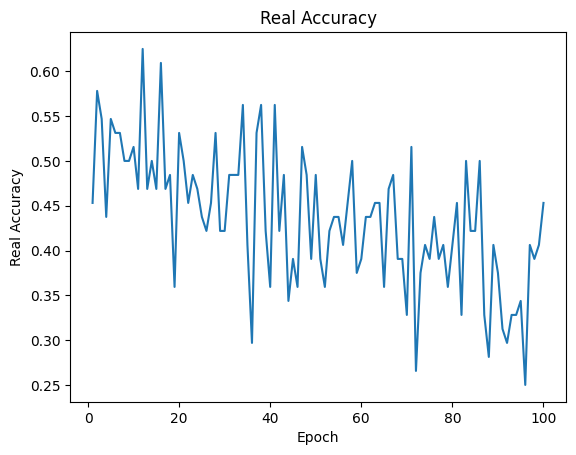

In [60]:
 # plot between real accuracy and epoch
    
pyplot.plot(range(1, len(real_accuracy_arr)+1), real_accuracy_arr,)
pyplot.xlabel('Epoch')
pyplot.ylabel('Real Accuracy')
pyplot.title('Real Accuracy')
pyplot.show()

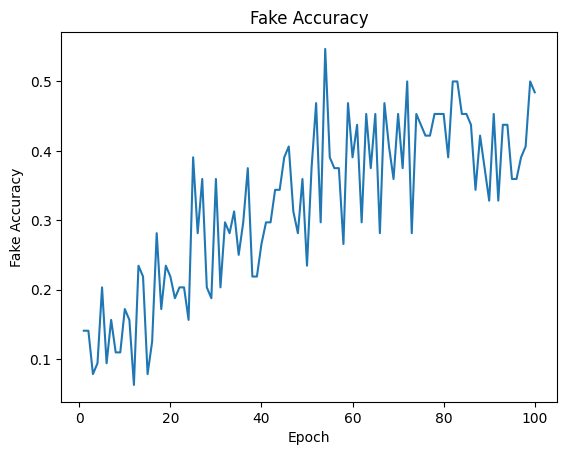

In [61]:
 # plot between real accuracy and epoch
    
pyplot.plot(range(1, len(fake_accuracy_arr)+1), fake_accuracy_arr)
pyplot.xlabel('Epoch')
pyplot.ylabel('Fake Accuracy')
pyplot.title('Fake Accuracy')
pyplot.show()

In [62]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

In [63]:
def define_gan(generator, discriminator):
	discriminator.trainable = False
	model = Sequential()
	model.add(generator)
	model.add(discriminator)
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [64]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
 x_input = randn(latent_dim * n)
 x_input = x_input.reshape(n, latent_dim)
 return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
 x_input = generate_latent_points(latent_dim, n)
 X = generator.predict(x_input)
 y = zeros((n, 1))
 return X, y


Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
Epoch:  1000
Epoch:  1100
Epoch:  1200
Epoch:  1300
Epoch:  1400
Epoch:  1500
Epoch:  1600
Epoch:  1700
Epoch:  1800
Epoch:  1900
Epoch:  2000
1999 0.5899999737739563 1.0


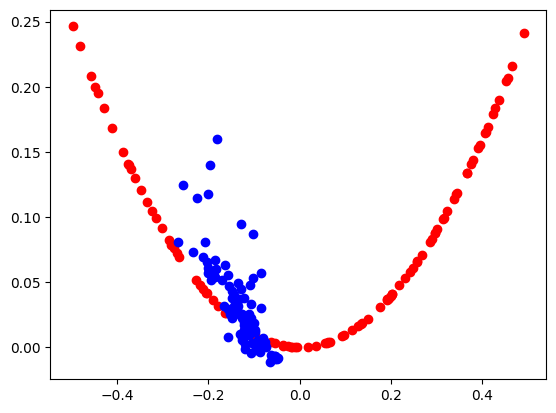

Epoch:  2100
Epoch:  2200
Epoch:  2300
Epoch:  2400
Epoch:  2500
Epoch:  2600
Epoch:  2700
Epoch:  2800
Epoch:  2900
Epoch:  3000
Epoch:  3100
Epoch:  3200
Epoch:  3300
Epoch:  3400
Epoch:  3500
Epoch:  3600
Epoch:  3700
Epoch:  3800
Epoch:  3900
Epoch:  4000
3999 0.4399999976158142 1.0


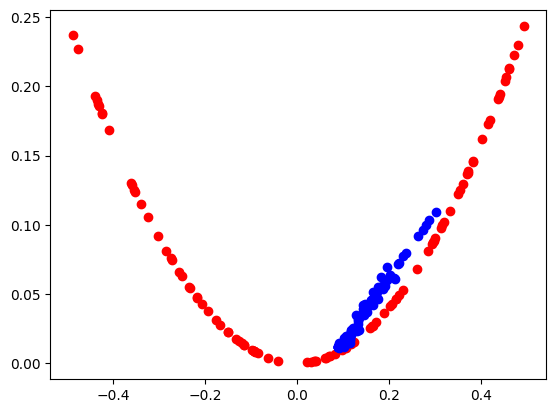

Epoch:  4100
Epoch:  4200
Epoch:  4300
Epoch:  4400
Epoch:  4500
Epoch:  4600
Epoch:  4700
Epoch:  4800
Epoch:  4900
Epoch:  5000
Epoch:  5100
Epoch:  5200
Epoch:  5300
Epoch:  5400
Epoch:  5500
Epoch:  5600
Epoch:  5700
Epoch:  5800
Epoch:  5900
Epoch:  6000
5999 0.47999998927116394 1.0


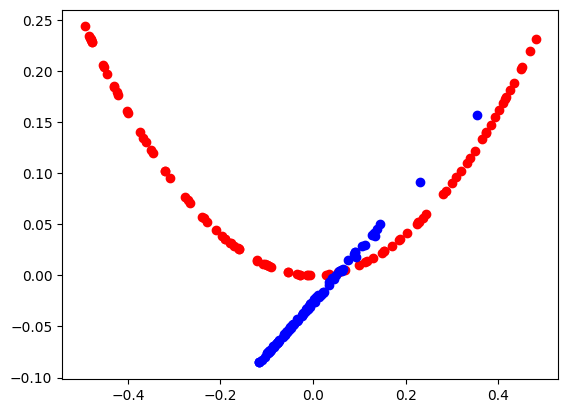

Epoch:  6100
Epoch:  6200
Epoch:  6300
Epoch:  6400
Epoch:  6500
Epoch:  6600
Epoch:  6700
Epoch:  6800
Epoch:  6900
Epoch:  7000
Epoch:  7100
Epoch:  7200
Epoch:  7300
Epoch:  7400
Epoch:  7500
Epoch:  7600
Epoch:  7700
Epoch:  7800
Epoch:  7900
Epoch:  8000
7999 0.49000000953674316 0.9200000166893005


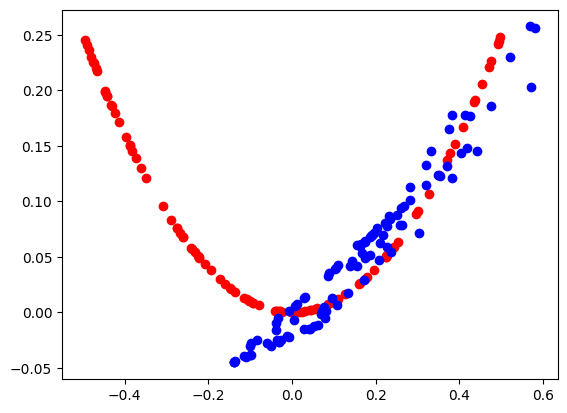

Epoch:  8100
Epoch:  8200
Epoch:  8300
Epoch:  8400
Epoch:  8500
Epoch:  8600
Epoch:  8700
Epoch:  8800
Epoch:  8900
Epoch:  9000
Epoch:  9100
Epoch:  9200
Epoch:  9300
Epoch:  9400
Epoch:  9500
Epoch:  9600
Epoch:  9700
Epoch:  9800
Epoch:  9900
Epoch:  10000
9999 0.6899999976158142 0.23000000417232513


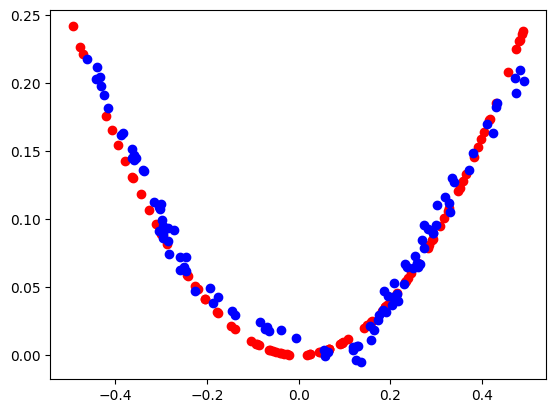

In [67]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	x_real, y_real = generate_real_samples(n)
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	print(epoch, acc_real, acc_fake)
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	half_batch = int(n_batch / 2)
	for i in range(n_epochs):
		x_real, y_real = generate_real_samples(half_batch)
		x_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		x_gan = generate_latent_points(latent_dim, n_batch)
		y_gan = ones((n_batch, 1))

		gan_model.train_on_batch(x_gan, y_gan)
		# print epochs on every 100th iteration
		if (i+1) % 100 == 0:
			print("Epoch: ", i+1)
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)


        

latent_dim = 100
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train(generator, discriminator, gan_model, latent_dim)